In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn import tree
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import warnings
import os
import re
import csv
import operator
import random
import datetime
from datetime import datetime
import warnings
import matplotlib
from matplotlib import pyplot
import time

In [2]:
#Reading Training Data
train = pd.read_csv('input/train_2016_v2.csv', parse_dates=["transactiondate"])
print ("Shape Of Train: ",train.shape)
train.head()
#Reading Properties Data
prop = pd.read_csv("input/properties_2016.csv")
print ("Shape Of Train: ",prop.shape)
prop.head()

Shape Of Train:  (90275, 3)


/Users/peichun/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Shape Of Train:  (2985217, 58)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


/Users/peichun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


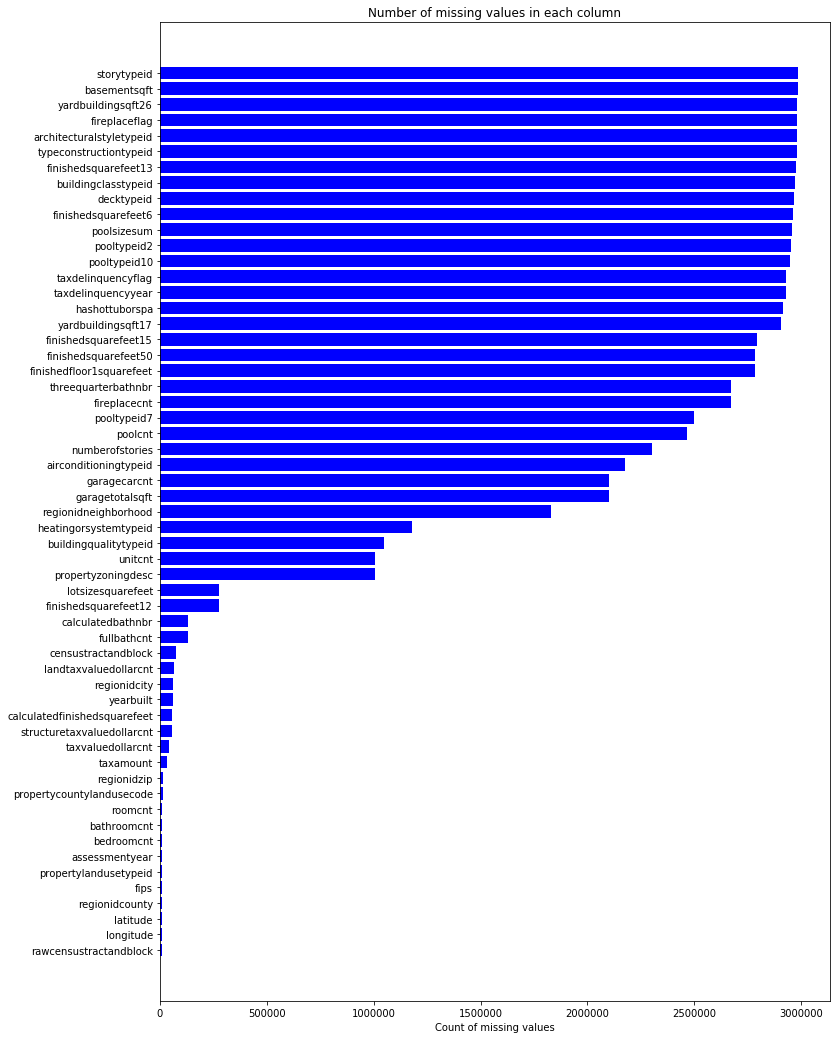

In [3]:
#Number of missing values in each column
missing_df = prop.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.ix[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

In [4]:
#analysis on  "logerror" field.
plt.figure(figsize=(8,6))
plt.scatter(range(dftrain.shape[0]), np.sort(dftrain.logerror.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

NameError: name 'dftrain' is not defined

<Figure size 576x432 with 0 Axes>

In [5]:
#Merging both files to create the train file
train = pd.merge(train, prop, on='parcelid', how='left')
print ("Shape Of Train: ",train.shape)
train.head()

Shape Of Train:  (90275, 60)


,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [6]:
#correlation with the target variable(="logerror") to see how they are related.
# Let us just impute the missing values with mean values to compute correlation coefficients #
mean_values = train.mean(axis=0)
train.fillna(mean_values, inplace=True)
train_df_new = train

/Users/peichun/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/peichun/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


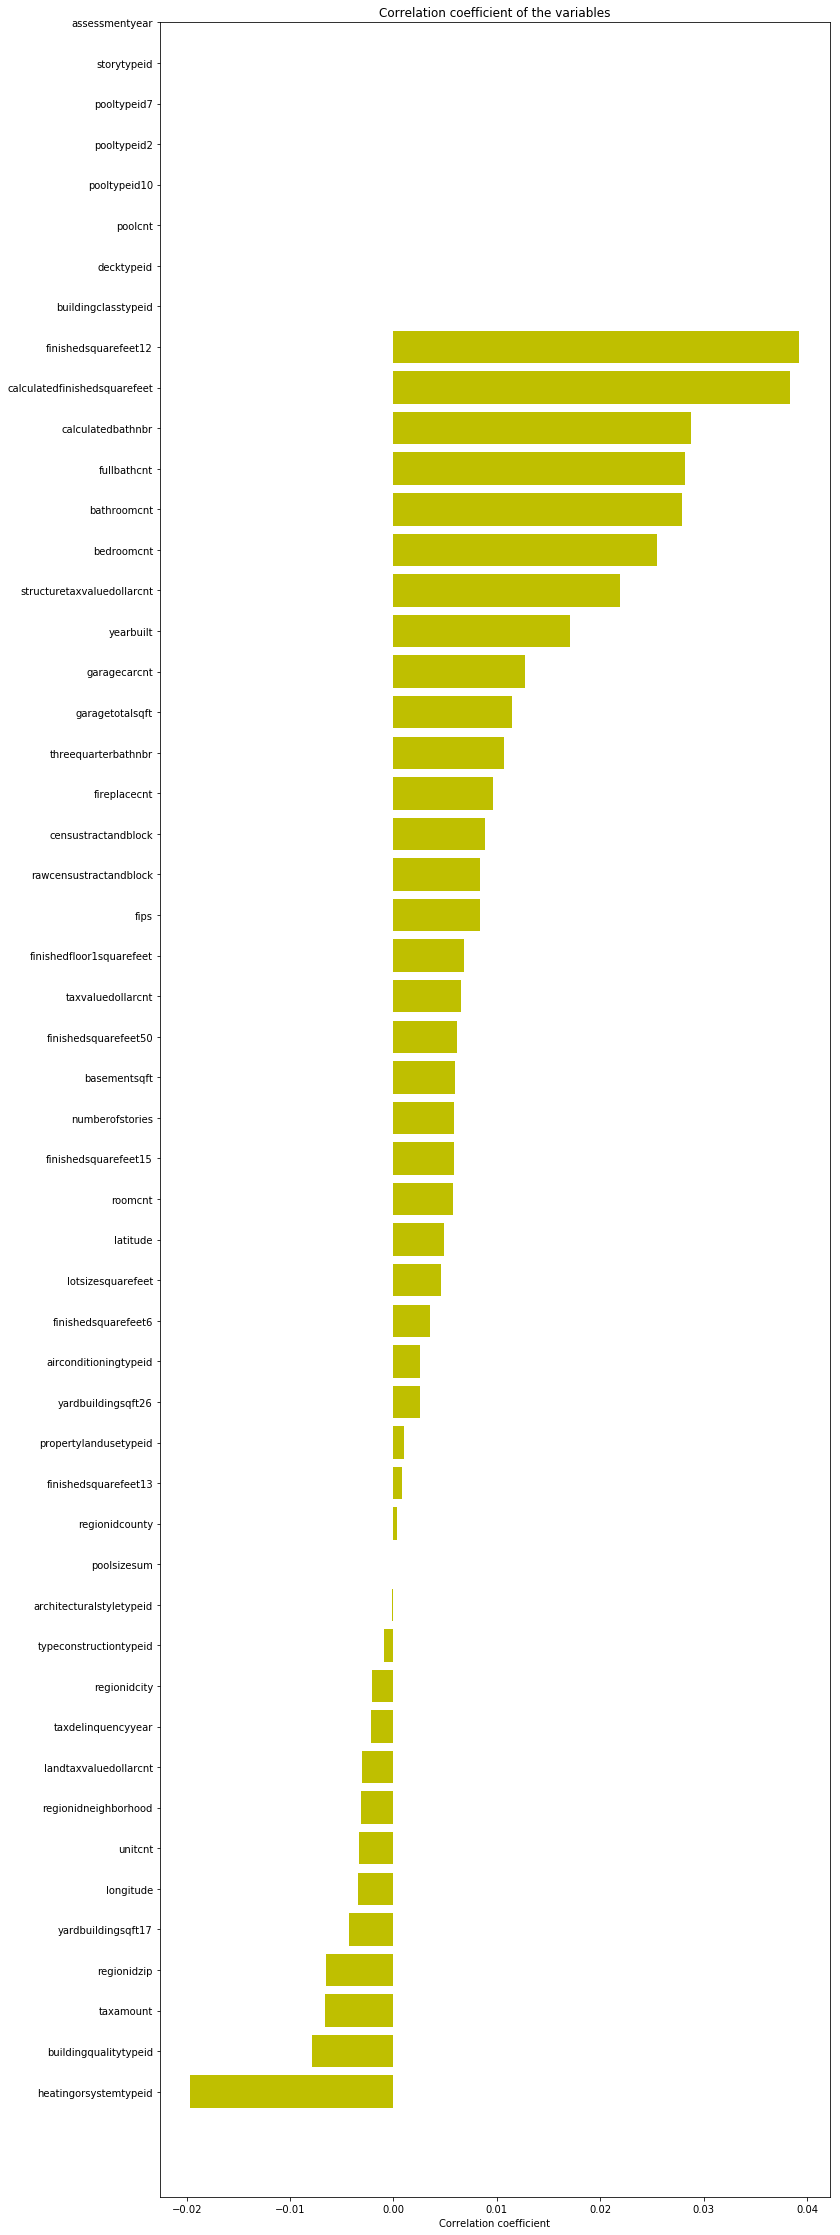

In [7]:
# Now let us look at the correlation coefficient of each of these variables #
x_cols = [col for col in train_df_new.columns if col not in ['logerror'] if train_df_new[col].dtype=='float64']

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(train_df_new[col].values, train_df_new.logerror.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
#autolabel(rects)
plt.show()

/Users/peichun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


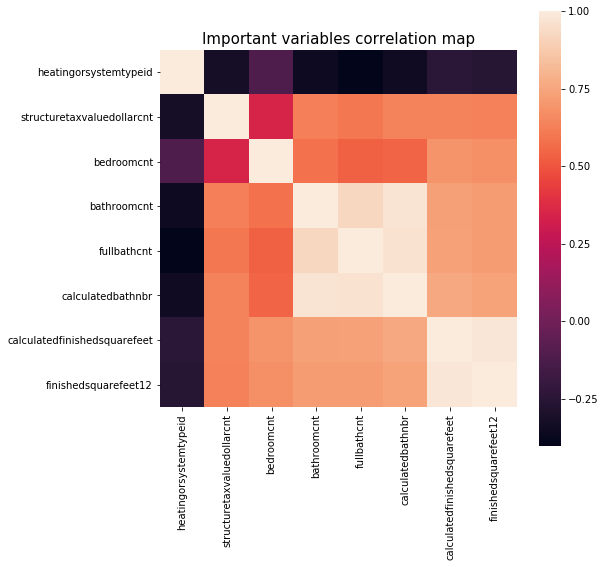

In [8]:
#the variables with high correlation values and then do some analysis on them.
corr_df_sel = corr_df.ix[(corr_df['corr_values']>0.02) | (corr_df['corr_values'] < -0.01)]
corr_df_sel

cols_to_use = corr_df_sel.col_labels.tolist()

temp_df = train[cols_to_use]
corrmat = temp_df.corr(method='spearman')
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Important variables correlation map", fontsize=15)
plt.show()

In [9]:
# how the finished square feet 12 varies with the log error.
col = "finishedsquarefeet12"
ulimit = np.percentile(train[col].values, 99.5)
llimit = np.percentile(train[col].values, 0.5)
train[col].ix[train[col]>ulimit] = ulimit
train[col].ix[train[col]<llimit] = llimit

plt.figure(figsize=(12,12))
sns.jointplot(x=train.finishedsquarefeet12.values, y=train.logerror.values, size=10, color=color[4])
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Finished Square Feet 12', fontsize=12)
plt.title("Finished square feet 12 Vs Log error", fontsize=15)
plt.show()

/Users/peichun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
/Users/peichun/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/peichun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


NameError: name 'color' is not defined

<Figure size 864x864 with 0 Axes>

In [10]:
# how the calculated finished square feet varies with the log error.
col = "calculatedfinishedsquarefeet"
ulimit = np.percentile(train[col].values, 99.5)
llimit = np.percentile(train[col].values, 0.5)
train[col].ix[train[col]>ulimit] = ulimit
train[col].ix[train[col]<llimit] = llimit

plt.figure(figsize=(12,12))
sns.jointplot(x=train.calculatedfinishedsquarefeet.values, y=train.logerror.values, size=10, color=color[5])
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Calculated finished square feet', fontsize=12)
plt.title("Calculated finished square feet Vs Log error", fontsize=15)
plt.show()

/Users/peichun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
/Users/peichun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


NameError: name 'color' is not defined

<Figure size 864x864 with 0 Axes>

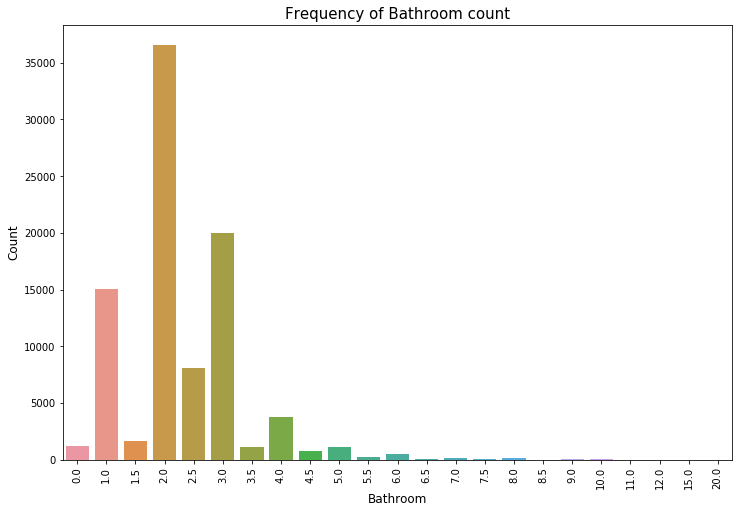

In [11]:
#Bathroom Count:
plt.figure(figsize=(12,8))
sns.countplot(x="bathroomcnt", data=train)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Bathroom', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Bathroom count", fontsize=15)
plt.show()

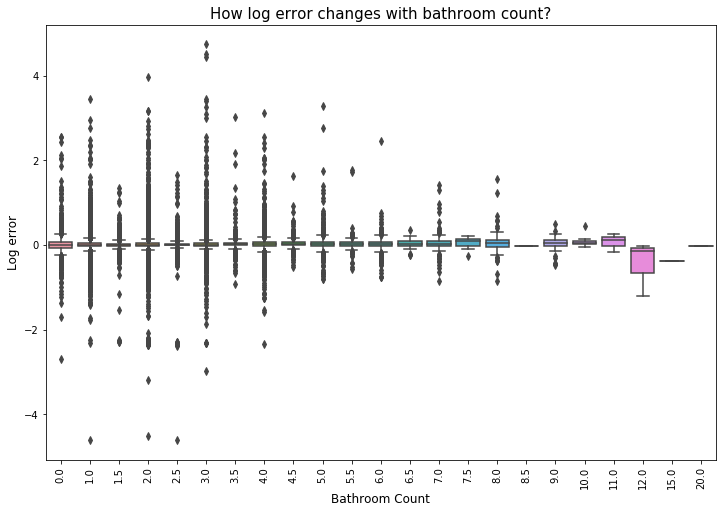

In [12]:
#how the log error changes based on Bathroom Count.
plt.figure(figsize=(12,8))
sns.boxplot(x="bathroomcnt", y="logerror", data=train)
plt.ylabel('Log error', fontsize=12)
plt.xlabel('Bathroom Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("How log error changes with bathroom count?", fontsize=15)
plt.show()

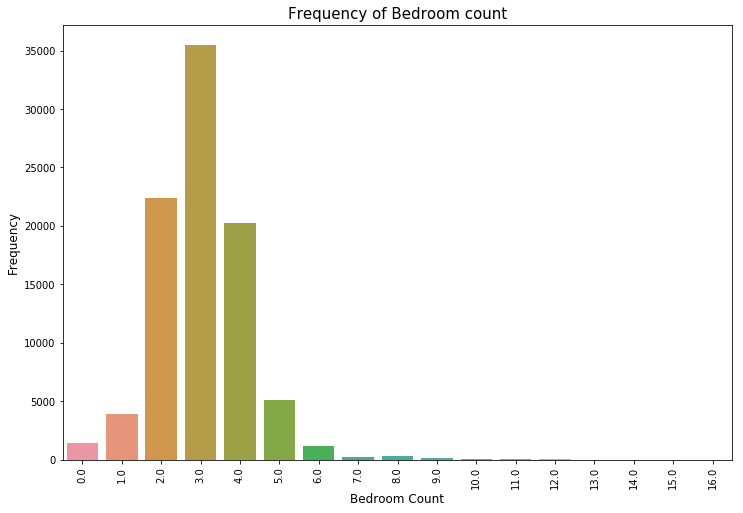

In [13]:
#Bedroom count:
plt.figure(figsize=(12,8))
sns.countplot(x="bedroomcnt", data=train)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Bedroom Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Bedroom count", fontsize=15)
plt.show()

/Users/peichun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/Users/peichun/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


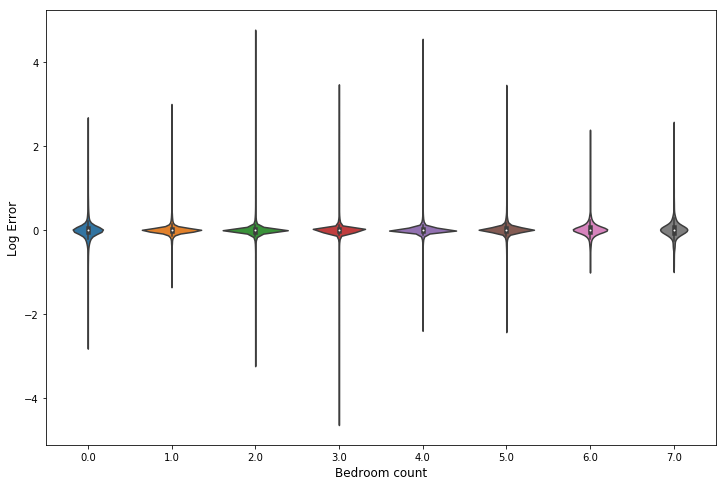

In [14]:
#how the log error changes based on edroom count.
train['bedroomcnt'].ix[train['bedroomcnt']>7] = 7
plt.figure(figsize=(12,8))
sns.violinplot(x='bedroomcnt', y='logerror', data=train)
plt.xlabel('Bedroom count', fontsize=12)
plt.ylabel('Log Error', fontsize=12)
plt.show()

In [15]:
#New Variable - Exploring number of transactions in each month
train['New_transaction_month'] = train['transactiondate'].dt.month

In [16]:
#Dropping Columns who's %age of NaN values is greater than 70%
for col in list(train.columns.values):
    nanValues = float(train[col].isnull().sum()) / len(train)
    if nanValues > 0.70:
        #print col
        train = train.drop([col], axis=1)

In [17]:
#Corelation Analysis, dropping highly correlated variables")
for col in ('calculatedbathnbr','fullbathcnt','finishedsquarefeet12','rawcensustractandblock','censustractandblock','landtaxvaluedollarcnt','taxvaluedollarcnt'):
    train = train.drop([col], axis=1)

In [18]:
#fill median for numeric null columns
for c in train.dtypes[train.dtypes == 'float64'].index.values:
    train[c].fillna(train[c].median(), inplace = True)

In [19]:
#Imputing Null values with -1 and encoding Objects
for c in train.columns:
    train[c]=train[c].fillna(-1)
    if train[c].dtype == object:
        lbl = LabelEncoder()
        lbl.fit(list(train[c].values))
        train[c] = lbl.transform(list(train[c].values))

In [20]:
#Dropping out outliers
train=train[ train.logerror > -0.417 ]
train=train[ train.logerror < 0.418 ]

#Processing data
for c, dtype in zip(train.columns, train.dtypes):
    if dtype == np.float64:
        train[c] = train[c].astype(np.float32)


In [21]:
#Splitting logerror as test data
test = train.logerror

#Dropping meta columns and casting to accepted dtypes
train = train.drop(['parcelid', 'logerror', 'transactiondate',
                'propertyzoningdesc', 'propertycountylandusecode'], axis=1)   
print('--------------------------------------------------')

--------------------------------------------------


In [22]:
#Adding new features

#proportion of living area
train['New_LivingAreaProp'] = train['calculatedfinishedsquarefeet']/train['lotsizesquarefeet']

#Number of properties in the zip
zip_count = train['regionidzip'].value_counts().to_dict()
train['New_zip_count'] = train['regionidzip'].map(zip_count)

#Number of properties in the city
city_count = train['regionidcity'].value_counts().to_dict()
train['New_city_count'] = train['regionidcity'].map(city_count)
print('--------------------------------------------------')


--------------------------------------------------


In [23]:
#Printing out all the Variables
dtype_df = train.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
print(dtype_df)

#Testing various Regression models
allModels = {} # Dictionary of models and their respective losses

                           Count Column Type
0          airconditioningtypeid     float32
1       architecturalstyletypeid     float32
2                   basementsqft     float32
3                    bathroomcnt     float32
4                     bedroomcnt     float32
5            buildingclasstypeid     float32
6          buildingqualitytypeid     float32
7                     decktypeid     float32
8       finishedfloor1squarefeet     float32
9   calculatedfinishedsquarefeet     float32
10          finishedsquarefeet13     float32
11          finishedsquarefeet15     float32
12          finishedsquarefeet50     float32
13           finishedsquarefeet6     float32
14                          fips     float32
15                  fireplacecnt     float32
16                  garagecarcnt     float32
17               garagetotalsqft     float32
18                hashottuborspa       int64
19         heatingorsystemtypeid     float32
20                      latitude     float32
21        

In [ ]:
#wirte the record in myfile.txt on cluster
file1 = open("myfile.txt","w")

#Running XGB Regression
file1.writelines("Running XGB Regression\n")
print("Running XGB Regression")
model = XGBRegressor()
number_process = [1, 2, 4, 8, 16]
for i in number_process:
    st = time.time()
    predicted = cross_val_score(model, train, test, scoring='neg_mean_absolute_error', cv=10, n_jobs=i)
    file1.writelines('%d process runs %0.3f seconds.' % (i,(time.time() - st))+"\n")
file1.writelines("XGB Regression: "+ str(predicted)+"\n")
file1.writelines("Score mean: "+ str(predicted.mean())+"\n")
allModels[model] = predicted.mean()

#Running Linear Regression
file1.writelines("Running Linear Regression\n")
print("Running Linear Regression")
model = linear_model.LinearRegression()
for i in number_process:
    st = time.time()
    predicted = cross_val_score(model, train, test, scoring='neg_mean_absolute_error', cv=10, n_jobs=i)
    file1.writelines('%d process runs %0.3f seconds.' % (i,(time.time() - st))+"\n")
file1.writelines("Linear Regression: "+ str(predicted)+"\n")
file1.writelines("Score mean: "+ str(predicted.mean())+"\n")
allModels[model] = predicted.mean()

#Running Decision Regression
file1.writelines("Running Decision Regression\n")
print("Running Decision Trees")
model = tree.DecisionTreeRegressor()
for i in number_process:
    st = time.time()
    predicted = cross_val_score(model, train, test, scoring='neg_mean_absolute_error', cv=10, n_jobs=i)
    file1.writelines('%d process runs %0.3f seconds.' % (i,(time.time() - st))+"\n")
file1.writelines("Decision Regression: "+ str(predicted)+"\n")
file1.writelines("Score mean: "+ str(predicted.mean())+"\n")
allModels[model] = predicted.mean()

#Running Random Regression
file1.writelines("Running Random Regression\n")
print("Running Random Forest")
model = RandomForestRegressor()
for i in number_process:
    st = time.time()
    predicted = cross_val_score(model, train, test, scoring='neg_mean_absolute_error', cv=10, n_jobs=i)
    file1.writelines('%d process runs %0.3f seconds.' % (i,(time.time() - st))+"\n")
file1.writelines("Random Regression: "+ str(predicted)+"\n")
file1.writelines("Score mean: "+ str(predicted.mean())+"\n")
allModels[model] = predicted.mean()

#Running Gradient Regression
file1.writelines("Running Gradient Regression\n")
print("Running Gradient Boosted Regressor")
model = GradientBoostingRegressor()
for i in number_process:
    st = time.time()
    predicted = cross_val_score(model, train, test, scoring='neg_mean_absolute_error', cv=10, n_jobs=i)
    file1.writelines('%d process runs %0.3f seconds.' % (i,(time.time() - st))+"\n")
file1.writelines("Gradient Regression: "+ str(predicted)+"\n")
file1.writelines("Score mean: "+ str(predicted.mean())+"\n")
allModels[model] = predicted.mean()


#Returning the all of model
file1.writelines("Returning the best model\n")
print("Returning the best model")
sortedModels = sorted(allModels.items(), key=operator.itemgetter(1), reverse=True)
for model in sortedModels:
    file1.writelines("Model: "+ str(model[0]))
    file1.writelines("Loss: "+ str(model[1])+"\n")
print('--------------------------------------------------')
file1.close() #to change file access modes 